In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data_url = "https://gist.githubusercontent.com/sarchak/b87ad2be315ce05f7a047550646f3c41/raw/0c7d83608111f74f212398fc0d2a704e4f8dc499/diamonds.csv"
df = pd.read_csv(data_url)
df.shape

(53940, 10)

In [ ]:
df[df.duplicated(keep=False)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1004,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
...,...,...,...,...,...,...,...,...,...,...
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.00,0.00,0.00
50078,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17
52860,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [ ]:
df = df.drop_duplicates(keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53794 non-null  float64
 1   cut      53794 non-null  object 
 2   color    53794 non-null  object 
 3   clarity  53794 non-null  object 
 4   depth    53794 non-null  float64
 5   table    53794 non-null  float64
 6   price    53794 non-null  int64  
 7   x        53794 non-null  float64
 8   y        53794 non-null  float64
 9   z        53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
x,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
y,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
z,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80


<Figure size 2000x1200 with 0 Axes>

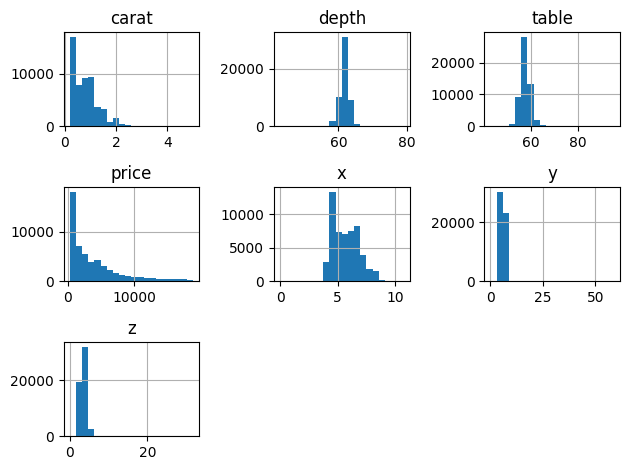

In [ ]:
plt.figure(figsize=(20, 12))
df.hist(bins=20)
plt.tight_layout()
plt.show()

In [ ]:
df["price"].describe()

count    53794.000000
mean      3933.065082
std       3988.114460
min        326.000000
25%        951.000000
50%       2401.000000
75%       5326.750000
max      18823.000000
Name: price, dtype: float64

<Axes: >

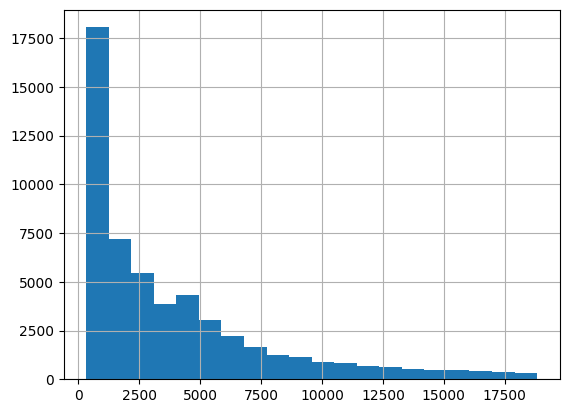

In [ ]:
df["price"].hist(bins=20)

In [ ]:
df.corr()


<ipython-input-648-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
depth,0.027861,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


In [ ]:
df.describe(exclude="number")

,cut,color,clarity
count,53794,53794,53794
unique,5,7,8
top,Ideal,G,SI1
freq,21488,11262,13032


In [ ]:
cat_cols = ["cut", "color", "clarity"]

for col in  cat_cols:
    print(col, df[col].unique())

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


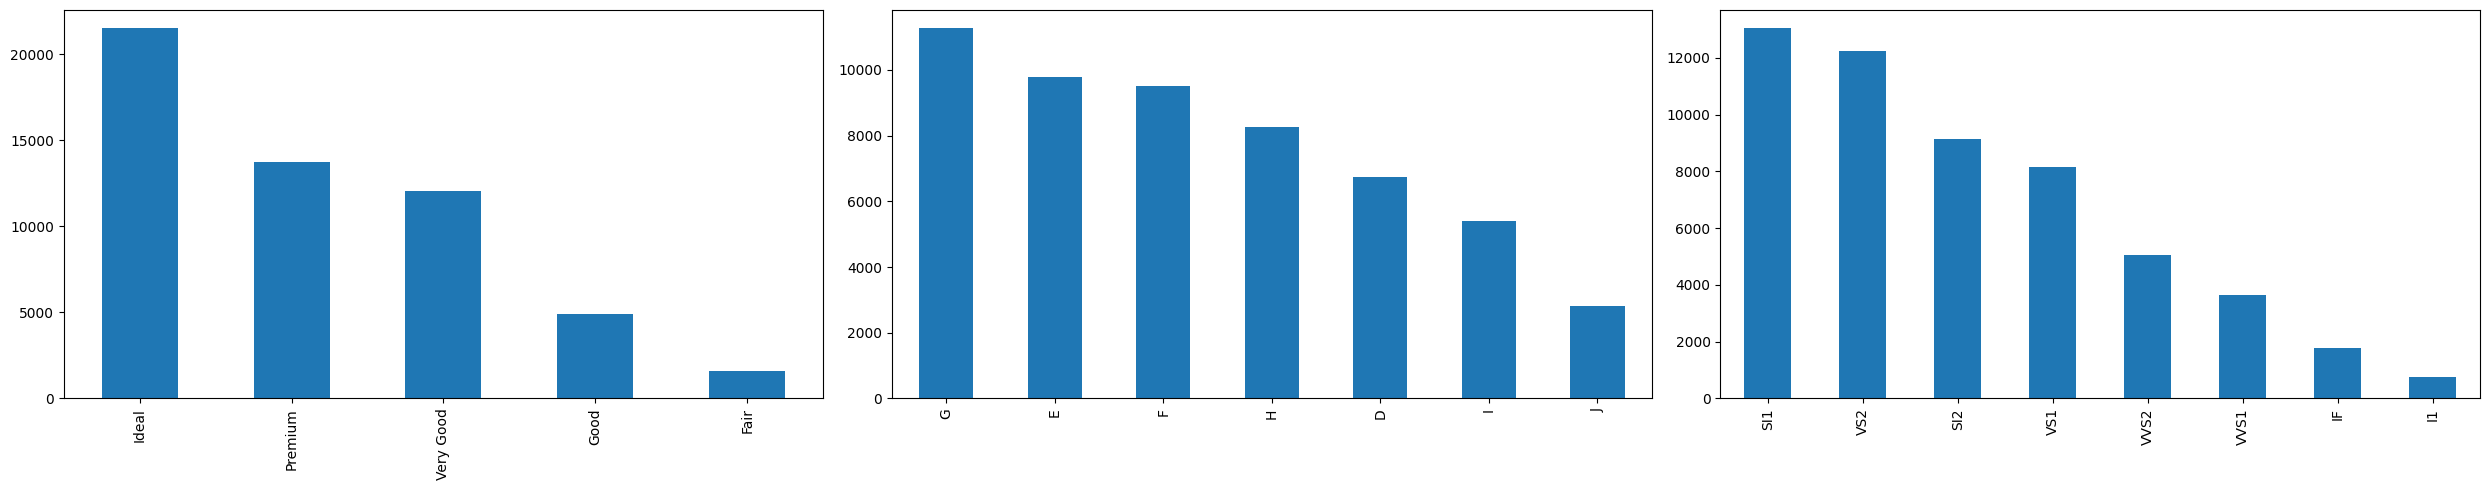

In [ ]:
plt.figure(figsize=(25, 5))
for i, name in enumerate(cat_cols):
    ax = plt.subplot(1, 3, i+ 1)
    df[name].value_counts().plot(kind="bar", ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,0.79778,61.748080,57.458109,3933.065082,5.731214,5.734653,3.538714
std,0.47339,1.429909,2.233679,3988.114460,1.120695,1.141209,0.705037
min,0.20000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.40000,61.000000,56.000000,951.000000,4.710000,4.720000,2.910000
50%,0.70000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.04000,62.500000,59.000000,5326.750000,6.540000,6.540000,4.030000
max,5.01000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
df = df.drop(df[(df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0)].index, axis=0)

In [ ]:
df = df.drop(df[(df["x"] >= 10) | (df["y"] >= 10) | (df["z"] >= 10)].index, axis=0)
df.reset_index(drop=True)
df.shape

(53766, 10)

In [ ]:
df.describe()

,carat,depth,table,price,x,y,z
count,53766.000000,53766.000000,53766.000000,53766.000000,53766.000000,53766.000000,53766.000000
mean,0.797136,61.748053,57.457646,3929.710375,5.731060,5.732960,3.538997
std,0.471731,1.429424,2.233184,3983.761526,1.117657,1.109606,0.690404
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,950.250000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5322.000000,6.540000,6.540000,4.030000
max,3.670000,79.000000,95.000000,18823.000000,9.860000,9.810000,6.380000


<Axes: >

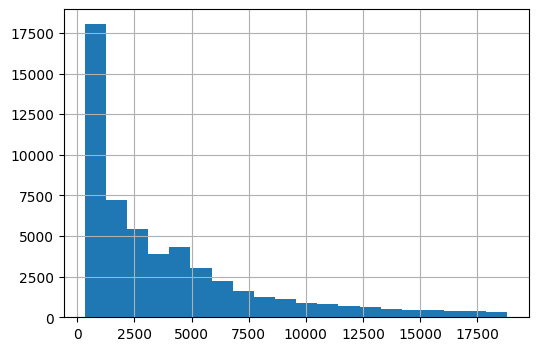

In [ ]:
plt.figure(figsize=(6, 4))
df["price"].hist(bins=20)

In [ ]:
df.head()
df.to_csv("/content/drive/MyDrive/diamonds/diamonds_improvement_1.csv")

In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_cols = ["cut", "color", "clarity"]

def dummy(df, col):
    ohe = OneHotEncoder()
    ohe.fit(df[[col]])
    X_dummy = pd.DataFrame(ohe.transform(df[[col]]).toarray(),
                           columns=[f"{col}_" + str(i) for i in df[col].unique()])
    return X_dummy

In [ ]:

X_cut = dummy(df, "cut")
X_color = dummy(df, "color")
X_clarity = dummy(df, "clarity")

In [ ]:
X_cut.shape, X_color.shape, X_clarity.shape

((53766, 5), (53766, 7), (53766, 8))

In [ ]:
X_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cut_Ideal      53766 non-null  float64
 1   cut_Premium    53766 non-null  float64
 2   cut_Good       53766 non-null  float64
 3   cut_Very Good  53766 non-null  float64
 4   cut_Fair       53766 non-null  float64
dtypes: float64(5)
memory usage: 2.1 MB


In [ ]:
X_color.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   color_E  53766 non-null  float64
 1   color_I  53766 non-null  float64
 2   color_J  53766 non-null  float64
 3   color_H  53766 non-null  float64
 4   color_F  53766 non-null  float64
 5   color_G  53766 non-null  float64
 6   color_D  53766 non-null  float64
dtypes: float64(7)
memory usage: 2.9 MB


In [ ]:
X_clarity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   clarity_SI2   53766 non-null  float64
 1   clarity_SI1   53766 non-null  float64
 2   clarity_VS1   53766 non-null  float64
 3   clarity_VS2   53766 non-null  float64
 4   clarity_VVS2  53766 non-null  float64
 5   clarity_VVS1  53766 non-null  float64
 6   clarity_I1    53766 non-null  float64
 7   clarity_IF    53766 non-null  float64
dtypes: float64(8)
memory usage: 3.3 MB


In [ ]:
df = df.reset_index(drop=True)
df = pd.concat([df, X_cut, X_color, X_clarity], axis=1)

In [ ]:
df = df.drop(["cut", "color", "clarity"], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53766 entries, 0 to 53765
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53766 non-null  float64
 1   depth          53766 non-null  float64
 2   table          53766 non-null  float64
 3   price          53766 non-null  int64  
 4   x              53766 non-null  float64
 5   y              53766 non-null  float64
 6   z              53766 non-null  float64
 7   cut_Ideal      53766 non-null  float64
 8   cut_Premium    53766 non-null  float64
 9   cut_Good       53766 non-null  float64
 10  cut_Very Good  53766 non-null  float64
 11  cut_Fair       53766 non-null  float64
 12  color_E        53766 non-null  float64
 13  color_I        53766 non-null  float64
 14  color_J        53766 non-null  float64
 15  color_H        53766 non-null  float64
 16  color_F        53766 non-null  float64
 17  color_G        53766 non-null  float64
 18  color_

In [ ]:
X = df.drop(["price"], axis=1)
y = df["price"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    shuffle=True,
                                                    random_state=0)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((43012, 26), (43012,), (10754, 26), (10754,))

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
num_cols = X.columns[:6]
sc.fit(X_train[num_cols])
X_train_std = sc.transform(X_train[num_cols])
X_test_std = sc.transform(X_test[num_cols])

In [ ]:
df.to_csv("/content/drive/MyDrive/diamonds/diamonds_improvement_2.csv")

In [ ]:
df["density"] = df["carat"] / (df["x"] * df["y"] * df["z"])

In [ ]:
df.to_csv("/content/drive/MyDrive/diamonds/diamonds_improvement_3.csv")

In [681]:
df.head()

,carat,depth,table,price,x,y,z,cut_Ideal,cut_Premium,cut_Good,...,color_D,clarity_SI2,clarity_SI1,clarity_VS1,clarity_VS2,clarity_VVS2,clarity_VVS1,clarity_I1,clarity_IF,density
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.006021
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.006086
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.006040
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.006207
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.005971
